In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

In [2]:
from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04


In [3]:
# base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v0_looseeta_240317_treefit_BCS/'
file_name = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v0_240322_treefit_BCS_etaconst/topo/resultfile/result_etaeta_pipi_tag/*.root'


In [4]:
base_filter='D0_M>0'


In [5]:
tree = 'etaeta_pipi_tag'
variables = ["__experiment__", "__run__", "__event__",\
             "D0_M","D0_isSignal","Dstarp_delM","Dstarp_CMS_p","Dstarp_isSignal",\
             "Dstarp_cosAngleBetweenMomentumAndVertexVector","Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "D0_cosAngleBetweenMomentumAndVertexVector","D0_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "Eta_1_isSignal", "Eta_1_M","Eta_1_p","Eta_1_isSignal",\
             "Eta_2_isSignal", "Eta_2_M","Eta_2_p","Eta_2_isSignal",\
             "pipi_eta1_Pi0_M","pipi_eta1_Pi0_Easym","pipi_eta1_Pi0_daughterDiffOfPhi_0_1","pipi_eta1_Pi0_daughterAngle_0_1",\
             "pipi_eta2_Pi0_M","pipi_eta2_Pi0_Easym","pipi_eta2_Pi0_daughterDiffOfPhi_0_1","pipi_eta2_Pi0_daughterAngle_0_1",\
             "Pis_dr","Pis_dz",\
             "etaeta_pipi_rank",\
             "iCascDcyBrP_Dst_0","iCascDcyBrCcP_Dst_0"
            ]



In [6]:
pd_df_v0 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=variables)

In [21]:
# cut = "etapip_pipipi_rank==1 & Dp_chiProb>0.01"
cut = "etaeta_pipi_rank==1"

# cut = "D0_M>0"

pd_df_test=pd_df_v0.query(cut)

# pd_df_test=pd_df_test.query("etapip_pipipi_rank==1")

pd_df_test

,__experiment__,__run__,__event__,D0_M,D0_isSignal,Dstarp_delM,Dstarp_CMS_p,Dstarp_isSignal,Dstarp_cosAngleBetweenMomentumAndVertexVector,Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,...,pipi_eta1_Pi0_daughterAngle_0_1,pipi_eta2_Pi0_M,pipi_eta2_Pi0_Easym,pipi_eta2_Pi0_daughterDiffOfPhi_0_1,pipi_eta2_Pi0_daughterAngle_0_1,Pis_dr,Pis_dz,etaeta_pipi_rank,iCascDcyBrP_Dst_0,iCascDcyBrCcP_Dst_0
0,1003,0,39597186,1.763693,NaN,0.151932,2.594650,NaN,0.567610,0.934097,...,0.262609,0.144072,0.144868,-1.493102,1.155431,0.008666,0.000596,1.0,0,-1
1,1003,0,18741356,1.735899,NaN,0.146790,2.548123,NaN,0.201823,-0.984646,...,1.388736,0.120915,0.520654,1.203498,1.059639,0.008217,0.033396,1.0,1,-1
2,1003,0,45858993,1.660691,NaN,0.150063,2.841480,NaN,-0.470965,-0.530855,...,1.079728,0.132030,0.143085,-0.445057,0.434001,0.006612,0.005049,1.0,-1,2
4,1003,0,45896263,1.602499,NaN,0.156432,2.575951,NaN,-0.597255,0.801528,...,0.903235,0.123420,0.862978,-0.992103,0.579054,0.009170,-0.021993,1.0,3,4
5,1003,0,9596965,1.892425,NaN,0.143996,2.533174,NaN,0.517977,-0.243762,...,1.149443,0.135644,0.414238,0.365242,1.106482,0.101356,0.136214,1.0,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23118,1003,0,221014015,2.097481,NaN,0.158568,2.624294,NaN,-0.290554,0.360618,...,0.347034,0.129080,0.201121,-0.701249,0.849323,0.015335,-0.026439,1.0,-1,-1
23119,1003,0,182556698,1.838311,NaN,0.155696,2.580112,NaN,-0.625826,0.190337,...,0.262783,0.121184,0.331167,0.192600,1.328041,0.005780,-0.053512,1.0,-1,-1
23120,1003,0,197431821,1.863183,NaN,0.154106,2.682526,NaN,0.086163,0.373876,...,0.666981,0.143587,0.015021,0.315236,0.942217,0.006990,-0.045857,1.0,14,293
23122,1003,0,265138336,1.796434,NaN,0.152131,2.816101,NaN,-0.483023,0.769227,...,0.358182,0.135666,0.321781,-1.285646,0.953732,0.004796,-0.067543,1.0,-1,-1


14429


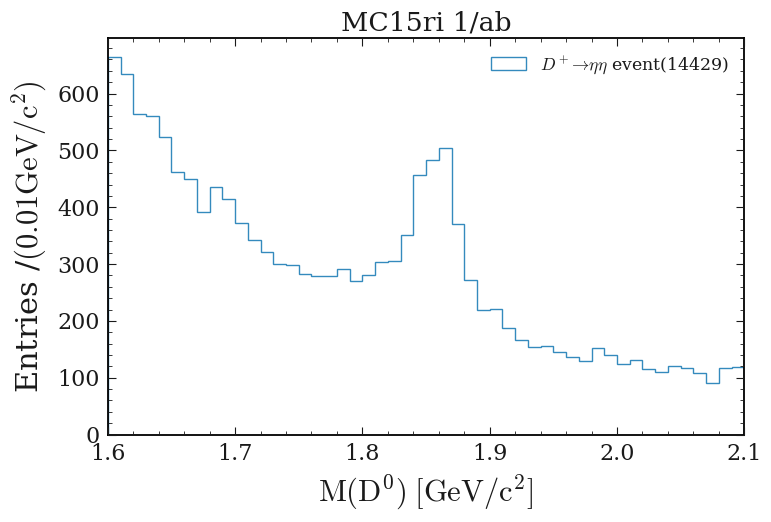

In [22]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \eta$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

14429


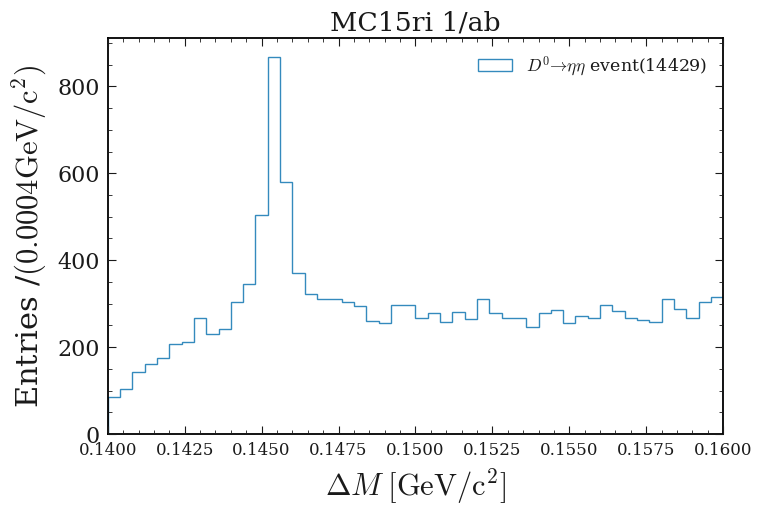

In [23]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0.14,0.16,51)

xm = np.linspace(*xrange)

df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)
value = "Dstarp_delM"
plt.hist(df[value],bins=xm,histtype='step',label=r'$D^0 \to \eta \eta$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\Delta M \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
plt.xticks(fontsize=12)

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

14429


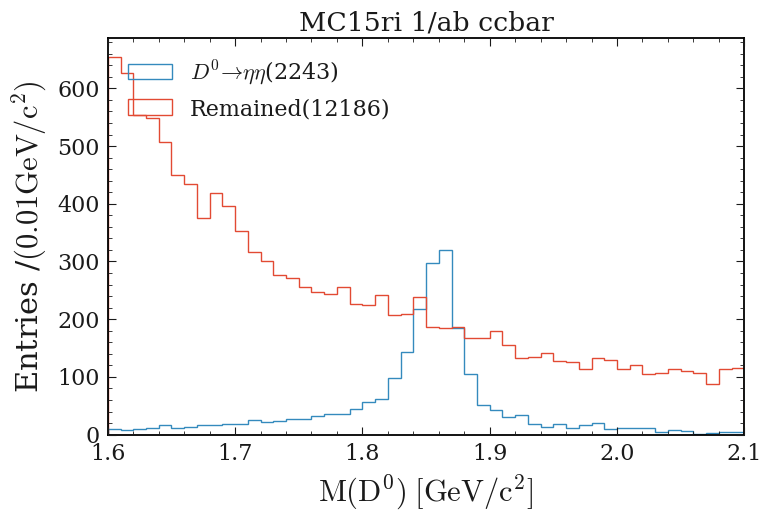

In [25]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

cut1 = "(iCascDcyBrP_Dst_0==6 | iCascDcyBrCcP_Dst_0==6)"
remained_cut = "iCascDcyBrP_Dst_0!=6 & iCascDcyBrCcP_Dst_0!=6 "

df = pd_df_test.query(cut1)
df_rest = pd_df_test.query(remained_cut)

N_df = len(df)
N_df_rest = len(df_rest)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta \eta$(' + str(N_df) +')');
plt.hist(df_rest["D0_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_generic/pipi/topo/MC15ri_etaet_pipi_tag_tight_v0_looseeta_240317_treefit_BCS_D0_M.png"
# plt.savefig(file1_name)
print(N_df+N_df_rest)

13204


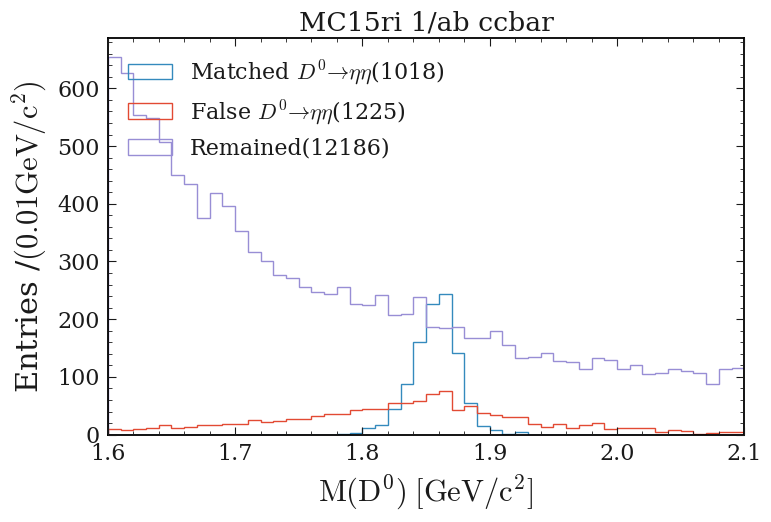

In [27]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

cut1 = "(iCascDcyBrP_Dst_0==6 | iCascDcyBrCcP_Dst_0==6) & Dstarp_isSignal==1"
cut2 = "(iCascDcyBrP_Dst_0==6 | iCascDcyBrCcP_Dst_0==6) & Dstarp_isSignal!=1"
remained_cut = "iCascDcyBrP_Dst_0!=6 & iCascDcyBrCcP_Dst_0!=6 "

df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)

df_rest = pd_df_test.query(remained_cut)

N_df = len(df)
N_df2 = len(df2)

N_df_rest = len(df_rest)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'Matched $D^0 \to \eta \eta$(' + str(N_df) +')');
plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'False $D^0 \to \eta \eta$(' + str(N_df2) +')');

plt.hist(df_rest["D0_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_generic/pipi/topo/MC15ri_etaet_pipi_tag_tight_v0_looseeta_240317_treefit_BCS_D0_M.png"
# plt.savefig(file1_name)
print(N_df+N_df_rest)

14429


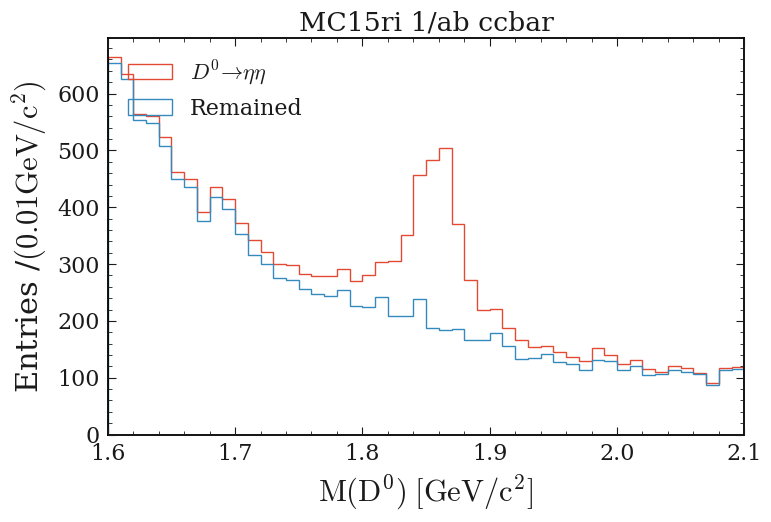

In [12]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.6, 2.1, 51)

xm = np.linspace(*xrange)

# cut1 = "(iCascDcyBrP_Dst_0==6 | iCascDcyBrCcP_Dst_0==6) "
# remained_cut = "iCascDcyBrP_Dst_0!=6 & iCascDcyBrCcP_Dst_0!=6 "

df = pd_df_test.query(cut1)
df_rest = pd_df_test.query(remained_cut)

N_df = len(df)
N_df_rest = len(df_rest)

# Plot histograms in reverse order to stack correctly

plt.hist([df_rest["D0_M"], df["D0_M"]], bins=xm, histtype='step', label=['Remained', r'$D^0 \to \eta \eta$'], stacked=True)

# plt.hist(df_rest["D0_M"], bins=xm, histtype='step', label=r'Remained(' + str(N_df_rest) +')', stacked=True)
# plt.hist(df["D0_M"], bins=xm, histtype='step', label=r'$D^0 \to \eta \eta$(' + str(N_df) +')', stacked=True)

plt.legend(loc="upper right", fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar')

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0], xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$')

plt.xlim(xrange[0], xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

file1_name = "/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_generic/pipi/topo/MC15ri_etaet_pipi_tag_tight_v0_looseeta_240317_treefit_BCS_D0_M_stacked.png"
plt.savefig(file1_name)
print(N_df + N_df_rest)


14429


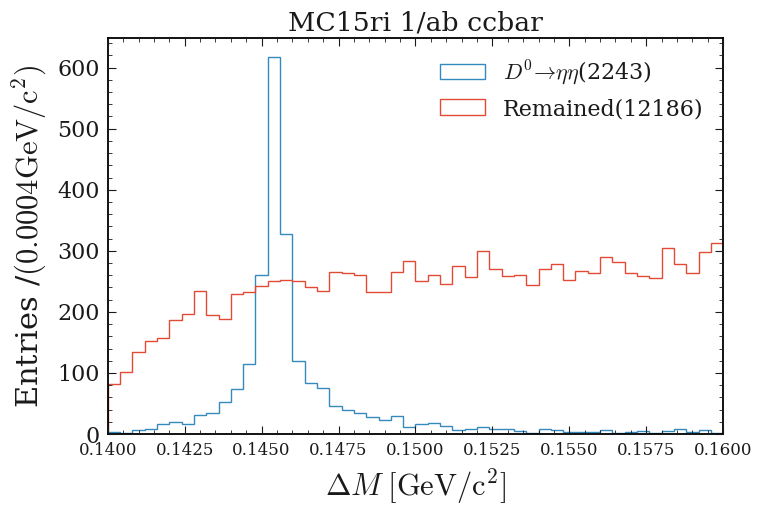

In [13]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (0.14,0.16,51)

xm = np.linspace(*xrange)

cut1 = "(iCascDcyBrP_Dst_0==6 | iCascDcyBrCcP_Dst_0==6) "
remained_cut = "iCascDcyBrP_Dst_0!=6 & iCascDcyBrCcP_Dst_0!=6 "

df = pd_df_test.query(cut1)
df_rest = pd_df_test.query(remained_cut)


N_df = len(df)
N_df_rest = len(df_rest)

plt.hist(df["Dstarp_delM"],bins=xm,histtype='step',label=r'$D^0 \to \eta \eta$(' + str(N_df) +')');
plt.hist(df_rest["Dstarp_delM"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\Delta M \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper right")

plt.tight_layout()
plt.xticks(fontsize=12)

file1_name="/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_generic/pipi/topo/MC15ri_etaet_pipi_tag_tight_v0_looseeta_240317_treefit_BCS_Dstarp_delM.png"
plt.savefig(file1_name)
# print(N_df+N_df2+N_df3+N_df_rest)
print(N_df+N_df_rest)

14429


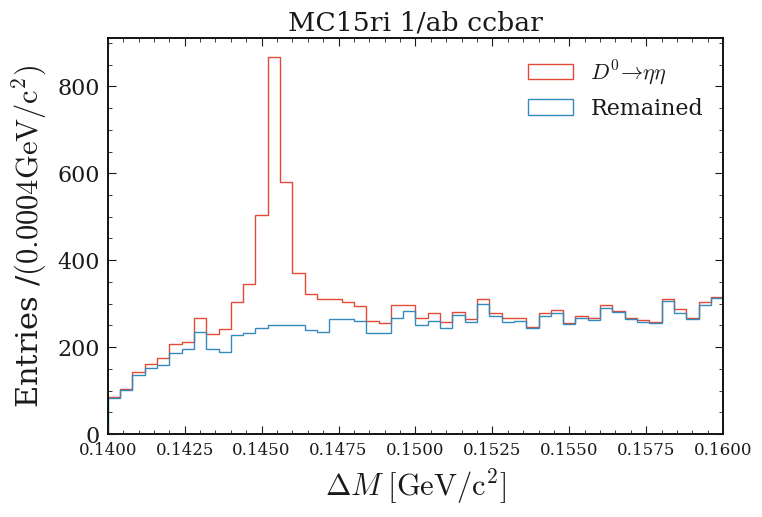

In [14]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (0.14,0.16,51)

xm = np.linspace(*xrange)

# cut1 = "(iCascDcyBrP_Dst_0==6 | iCascDcyBrCcP_Dst_0==6) "
# remained_cut = "iCascDcyBrP_Dst_0!=6 & iCascDcyBrCcP_Dst_0!=6 "

df = pd_df_test.query(cut1)
df_rest = pd_df_test.query(remained_cut)


N_df = len(df)
N_df_rest = len(df_rest)

plt.hist([df_rest["Dstarp_delM"], df["Dstarp_delM"]], bins=xm, histtype='step', label=['Remained', r'$D^0 \to \eta \eta$'], stacked=True)


# plt.hist(df["Dstarp_delM"],bins=xm,histtype='step',label=r'$D^0 \to \eta \eta$(' + str(N_df) +')');
# plt.hist(df_rest["Dstarp_delM"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\Delta M \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper right")

plt.tight_layout()
plt.xticks(fontsize=12)

file1_name="/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_generic/pipi/topo/MC15ri_etaet_pipi_tag_tight_v0_looseeta_240317_treefit_BCS_Dstarp_delM_stacked.png"
plt.savefig(file1_name)
# print(N_df+N_df2+N_df3+N_df_rest)
print(N_df+N_df_rest)